# Chapter 10 - Exercises

## 1

### Answers

* a) no - looks fine as-is
* b) yes - attempt to make more linear
* c) yes - attempt to make spread more consistent

## 3

### Answers

* a) yes - seasonal pattern across year
* b) not any of those described in the ladder approach; maybe a time-series based re-expression

## 5

### Answers

* a) 16.445
* b) 7.840
* c) 0.357
* d) 1.75
* e) 27.59

In [4]:
import math
math.exp(1.2 + 0.8 * 2)

16.444646771097048

In [5]:
math.pow(1.2 + 0.8 * 2, 2)

7.839999999999999

In [7]:
math.exp(1.2 + 0.8 * math.log(2, math.e))

5.78065931459459

In [8]:
1 / (1.2 + .8 * 2)

0.35714285714285715

In [9]:
1.2 + 0.8 * math.log(2, math.e)

1.754517744447956

In [10]:
math.pow(10, 1.2 + 0.8 * math.log(2, 10))

27.59459322922429

## 7

### Answers

* a) straight, linear, negative, fairly strong
* b) for each 1000 lb increase in weight, gas mileage goes down by 7.56 mpg
* c) no - there's a clear curve in the regression plot

##  9

### Answers

* a) the residual variance is much smaller, and shows no clear pattern
* b) fuel consumption = 0.624932 + 1.17791 + weight
* c) for each 1000 lb increase in weight, fuel consumption goes up by 1.17791 gal / 100mi
* d) 21.063 mi/gallon

In [16]:
0.624932 + 1.17791 * 3.5
# 4.747617 gal / 100 miles
100 / (0.624932 + 1.17791 * 3.5)

21.063198653134826

## 11

### Answers

* a) not necessarily - it suggests that the model explains a lot of the variance in the response variable, but not that the model is _appropriate_
* b) no - clear curved pattern in residuals; emphasizing the curve in the original data

## 13

### Answers

* It's not clear that this is much better.  There's still a large change in direction, and what appear to be multiple fluctuations within the downward trend of the second part of the curve.

## 15

### Answers

* a) association appears linear and strong, but the residuals show a clear curved pattern
* b) use the sqrt of stopping dist
* c) yhat = 3.303404 + 0.235484 * x
* d) 264.23 ft
* e) 391.53 ft
* f) fairly confident; residuals don't show curved pattern; high r^2; low std error

In [50]:
# %load ../snippets/data-imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')


In [51]:
speed = [20, 20, 20, 30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60]
stoppingDist = [64, 62, 59, 114, 118, 105, 153, 171, 165, 231, 203, 238, 317, 321, 276]
brakes = DataFrame(data={
    "speed": speed,
    "dist": stoppingDist
})
brakes.head()

,dist,speed
0,64,20
1,62,20
2,59,20
3,114,30
4,118,30


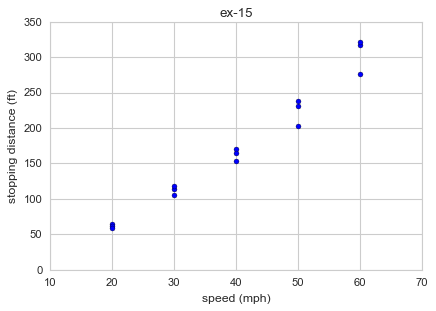

In [52]:
plt.scatter(brakes.speed, brakes.dist)
plt.xlabel("speed (mph)")
plt.ylabel("stopping distance (ft)")
plt.title("ex-15");

In [53]:
r = np.corrcoef(brakes.speed, brakes.dist)[0][1]
r

0.98462813853605058

In [54]:
b1 = r * (brakes.dist.std() / brakes.speed.std())
b1

5.9766666666666666

In [55]:
b0 = brakes.dist.mean() - b1 * brakes.speed.mean()
b0

-65.933333333333337

In [56]:
def stopping_dist(speed):
    return b0 + b1 * speed

In [57]:
brakes['predict'] = brakes.speed.apply(lambda x: stopping_dist(x))
brakes.head()

,dist,speed,predict
0,64,20,53.600000
1,62,20,53.600000
2,59,20,53.600000
3,114,30,113.366667
4,118,30,113.366667


In [58]:
brakes['residual'] = brakes.dist - brakes.predict
brakes.head()

,dist,speed,predict,residual
0,64,20,53.600000,10.400000
1,62,20,53.600000,8.400000
2,59,20,53.600000,5.400000
3,114,30,113.366667,0.633333
4,118,30,113.366667,4.633333


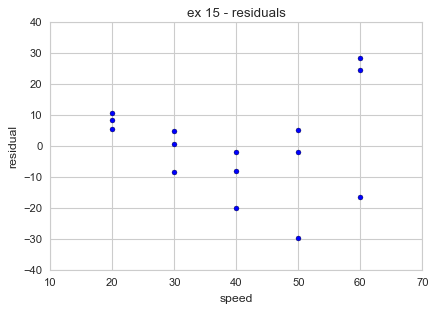

In [59]:
plt.scatter(brakes.speed, brakes.residual)
plt.xlabel("speed")
plt.ylabel("residual")
plt.title("ex 15 - residuals");

In [60]:
brakes["sqrt_dist"] = np.sqrt(brakes.dist)
brakes.head()

,dist,speed,predict,residual,sqrt_dist
0,64,20,53.600000,10.400000,8.000000
1,62,20,53.600000,8.400000,7.874008
2,59,20,53.600000,5.400000,7.681146
3,114,30,113.366667,0.633333,10.677078
4,118,30,113.366667,4.633333,10.862780


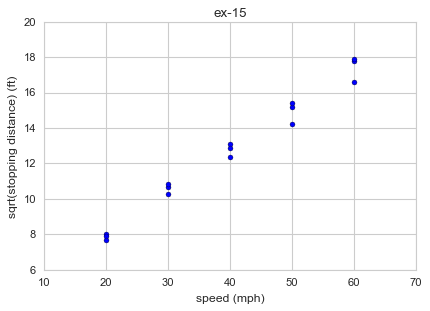

In [68]:
plt.scatter(brakes.speed, brakes.sqrt_dist)
plt.xlabel("speed (mph)")
plt.ylabel("sqrt(stopping distance) (ft)")
plt.title("ex-15");

In [69]:
import scipy.stats
lr = scipy.stats.linregress(brakes.speed, brakes.sqrt_dist)
b1 = lr.slope
b0 = lr.intercept
brakes.predict = b0 + b1 * brakes.speed
brakes.residual = brakes.sqrt_dist - brakes.predict
brakes.head()

,dist,speed,predict,residual,sqrt_dist
0,64,20,8.013074,-0.013074,8.000000
1,62,20,8.013074,-0.139066,7.874008
2,59,20,8.013074,-0.331928,7.681146
3,114,30,10.367909,0.309169,10.677078
4,118,30,10.367909,0.494871,10.862780


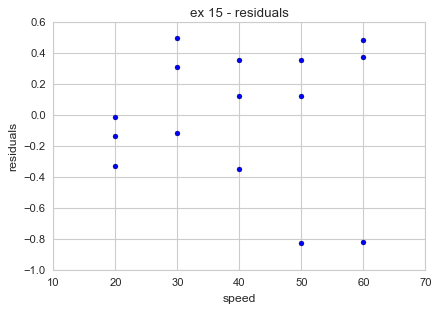

In [70]:
plt.scatter(brakes.speed, brakes.residual)
plt.xlabel("speed")
plt.ylabel("residuals")
plt.title("ex 15 - residuals");

In [71]:
print("yhat = %f + %f * x" % (b0, b1))

yhat = 3.303404 + 0.235484 * x


In [72]:
est = math.pow(3.303404 + 0.235484 * 70, 2)
est

391.536608096656

In [73]:
lr

LinregressResult(slope=0.23548350561825021, intercept=3.303404005127911, rvalue=0.99221941764255095, pvalue=3.774265671034281e-13, stderr=0.0081951278043788777)

In [75]:
print("R^2: %f" % (math.pow(lr.rvalue, 2)))

R^2: 0.984499


## 

### Answers

* 


## 

### Answers

* 
